In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
#Importing the dataset
df = pd.DataFrame (data= {'YearsExperience':[1.1,1.3,1.5,2,2.2,2.9,3,3.2,3.2,3.7,3.9,4,4,4.1,4.5,4.9,5.1,5.3,
                                            5.9,6,6.8,7.1,7.9,8.2,8.7,9,9.5,9.6,10.3,10.5],
                          'Salary':[39343,46205,37731,43525,39891,56642,60150,54445,64445,57189,63218,55794,
                                    56957,57081,61111,67938,66029,83088,81363,93940,91738,98273,101302,113812,
                                    109431,105582,116969,112635,122391,121872]})

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
#Renaming the columns for ease of usage
df1=df.rename({'YearsExperience':'YExp', 'Salary':'Sal'},axis=1)


# CHECKING FOR OUTLIERS

<AxesSubplot:xlabel='YExp'>

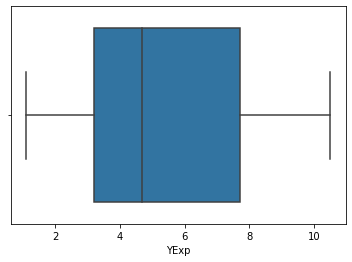

In [6]:
sns.boxplot(x='YExp', data=df1)

<AxesSubplot:xlabel='Sal'>

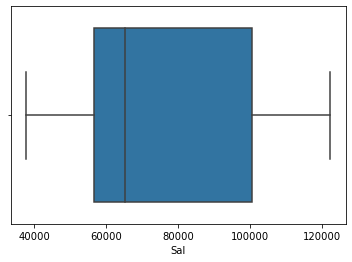

In [7]:
sns.boxplot(x='Sal', data=df1)

<AxesSubplot:xlabel='YExp', ylabel='Count'>

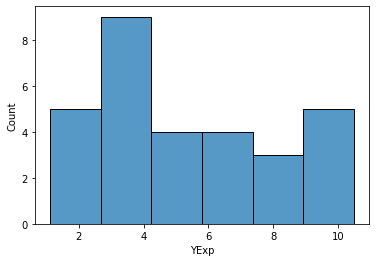

In [8]:
sns.histplot(df1.YExp)

<AxesSubplot:xlabel='Sal', ylabel='Count'>

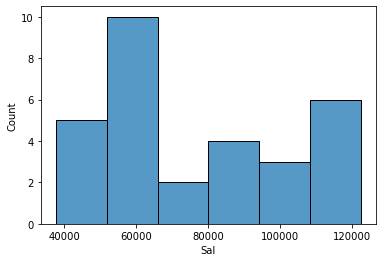

In [9]:
sns.histplot(df1.Sal)

# Checking for duplicated rows

In [10]:
df1[df1.duplicated()].shape

(0, 2)

# Building the model

In [11]:
model = smf.ols('Sal~YExp', data=df1).fit()

<AxesSubplot:xlabel='YExp', ylabel='Sal'>

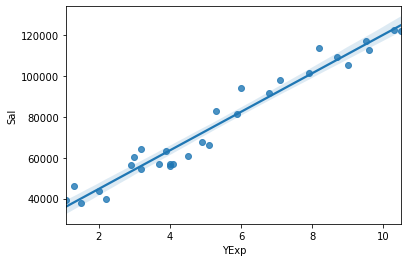

In [12]:
sns.regplot(x='YExp', y='Sal', data=df1)

In [13]:
model.params

Intercept    25792.200199
YExp          9449.962321
dtype: float64

In [14]:
print('pvalue:', model.pvalues, '\n','\n','Rsquared value is:', model.rsquared, '\n','\n', 
      'Adjusted Rsquared value is:', model.rsquared_adj)

pvalue: Intercept    5.511950e-12
YExp         1.143068e-20
dtype: float64 
 
 Rsquared value is: 0.9569566641435086 
 
 Adjusted Rsquared value is: 0.9554194021486339


In [15]:
#The R-Squared value is >0.95, hence we can say it's an excellent model and there's no need for any interation.

# Predicting the existing data

In [16]:
pred = pd.DataFrame (model.predict(df1), columns=['Predicted Salary'])

In [17]:
pred

,Predicted Salary
0,36187.158752
1,38077.151217
2,39967.143681
3,44692.124842
4,46582.117306
5,53197.090931
6,54142.087163
7,56032.079627
8,56032.079627
9,60757.060788


In [18]:
pred1 = pd.concat([df1, pred], axis=1)

In [20]:
pred1

,YExp,Sal,Predicted Salary
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306
5,2.9,56642,53197.090931
6,3.0,60150,54142.087163
7,3.2,54445,56032.079627
8,3.2,64445,56032.079627
9,3.7,57189,60757.060788


In [21]:
Error = pd.DataFrame ((pred1['Sal']- pred1['Predicted Salary']), columns=['Error'])

In [22]:
final = pd.concat ([pred1, Error], axis=1)

In [23]:
final

,YExp,Sal,Predicted Salary,Error
0,1.1,39343,36187.158752,3155.841248
1,1.3,46205,38077.151217,8127.848783
2,1.5,37731,39967.143681,-2236.143681
3,2.0,43525,44692.124842,-1167.124842
4,2.2,39891,46582.117306,-6691.117306
5,2.9,56642,53197.090931,3444.909069
6,3.0,60150,54142.087163,6007.912837
7,3.2,54445,56032.079627,-1587.079627
8,3.2,64445,56032.079627,8412.920373
9,3.7,57189,60757.060788,-3568.060788


# Predicting the new data

In [24]:
new_data= pd.Series([5,7,11,15,20])

In [25]:
pred_new = pd.DataFrame(new_data, columns=['YExp'])

In [26]:
model.predict(pred_new)

0     73042.011806
1     91941.936449
2    129741.785735
3    167541.635020
4    214791.446628
dtype: float64